In [0]:
# import os
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
from keras.models import Sequential
from keras import layers
from pickle import dump,load
from keras.preprocessing.text import Tokenizer
from keras.layers import Dropout

import pandas as pd
import numpy as np

from keras.models import Sequential
from keras import layers

import string

import seaborn as sns

import re
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.utils import class_weight
import os
%matplotlib inline

Using TensorFlow backend.


In [0]:
#drugs_model = pd.read_csv('drugs_model.csv')
drugs_model = pd.read_csv('drugs_model2.csv')

In [0]:
sentences =drugs_model['clean_text'].values.astype('U').reshape(-1,1)
y=drugs_model['rating_class_numeric'].values.reshape(-1,1)

In [0]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(return_indices=True)
# X_rus, y_rus, id_rus = rus.fit_sample(sentences, y)

In [0]:
from keras.utils import to_categorical
y = to_categorical(y)

In [0]:
y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [0]:
sentences = [str(x) for x in sentences]

In [0]:
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

In [0]:
vocabulary_size = len(tokenizer.word_counts)+1

In [0]:
print('Found %d unique words.' % vocabulary_size)

Found 60366 unique words.


In [0]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sequences, y, test_size=0.25, random_state=42)

In [0]:

max_length = 100

sentences_train = pad_sequences(sentences_train, padding='post', maxlen=max_length)
sentences_test = pad_sequences(sentences_test, padding='post', maxlen=max_length)

print(sentences_train[0, :])

print(y_train.shape)

[  27   36   10    7 1134   11 1052   14   17    3   43 1430  139    1
   11  206   19   38   16   87  190    1  219   99 1108   15 9704  497
 1082    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
(161297, 3)


In [0]:
# class_weights = class_weight.compute_class_weight('balanced'
#                                                ,np.unique(y_train)
#                                                ,y_train)

# class_weight_dict = dict(enumerate(class_weights))

In [0]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(return_indices=True)
# X_rus, y_rus, id_rus = rus.fit_sample(sentences_train, y_train)

In [0]:
# from imblearn.over_sampling import SMOTE
# from imblearn.combine import SMOTEENN

# method = SMOTE()

# # Create the resampled feature set
# X_rus, y_rus = method.fit_sample(sentences_train, y_train)

In [0]:
# print(X_rus.shape)
# print(y_rus.shape)


In [0]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [0]:
embedding_dim = 100

max_length = 100
model = Sequential()
model.add(layers.Embedding(vocabulary_size+1, embedding_dim, input_length=max_length))
model.add(Dropout(0.2))
model.add(layers.Conv1D(filters = 128, kernel_size=5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          6036700   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_2 (Dense)      

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 161297 samples, validate on 161297 samples
Epoch 1/20
161297/161297 [==============================] - 10s 59us/step - loss: 1.1872 - acc: 0.5460 - val_loss: 0.7101 - val_acc: 0.7220

Epoch 00001: val_loss improved from inf to 0.71005, saving model to keras_model
Epoch 2/20
161297/161297 [==============================] - 5s 32us/step - loss: 0.9125 - acc: 0.7472 - val_loss: 0.5741 - val_acc: 0.7833

Epoch 00002: val_loss improved from 0.71005 to 0.57414, saving model to keras_model
Epoch 3/20
161297/161297 [==============================] - 8s 47us/step - loss: 0.7890 - acc: 0.7827 - val_loss: 0.4744 - val_acc: 0.8306

Epoch 00003: val_loss improved from 0.57414 to 0.47444, saving model to keras_model
Epoch 4/20
161297/161297 [==============================] - 9s 56us/step - loss: 0.6788 - acc: 0.8159 - val_loss: 0.3942 - val_acc: 0.8666

Epoch 00004: 

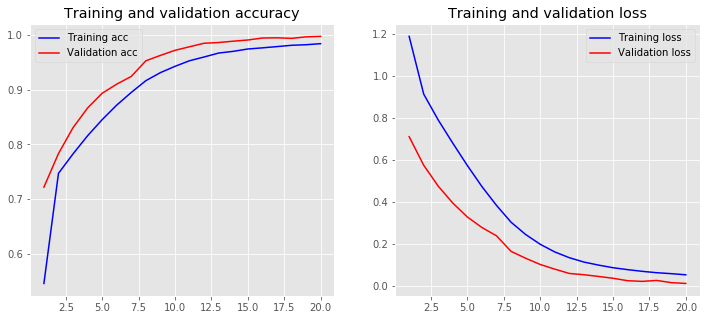

In [0]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

history = model.fit(sentences_train, y_train,class_weight = {0: 2.,1: 4.,2: .6},
                    epochs=20,
                    verbose=1,
                    validation_data=(sentences_train, y_train),
                    batch_size=1024, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001), 
                                ModelCheckpoint('keras_model', 
                                 monitor='val_loss', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 mode='auto') ])
loss, accuracy = model.evaluate(sentences_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(sentences_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [0]:
from keras.models import load_model

model = load_model('keras_model')

In [0]:
#model2 = load_model('keras_model')

In [0]:
preds = to_categorical(model.predict_classes(sentences_test))

In [0]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, log_loss, classification_report



print(confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1)))

print('\n', 'Classification Report')
print(classification_report(y_test, preds))


print('\n', 'accuracy Score')
print('Accuracy: ', accuracy_score(y_test, preds))

print('\n', 'f1 Score')
print(metrics.f1_score(y_test, preds, average='weighted'))


[[11660   470  1221]
 [  629  3329   952]
 [ 1233   777 33495]]

 Classification Report
              precision    recall  f1-score   support

           0       0.86      0.87      0.87     13351
           1       0.73      0.68      0.70      4910
           2       0.94      0.94      0.94     35505

   micro avg       0.90      0.90      0.90     53766
   macro avg       0.84      0.83      0.84     53766
weighted avg       0.90      0.90      0.90     53766
 samples avg       0.90      0.90      0.90     53766


 accuracy Score
Accuracy:  0.9017594762489306

 f1 Score
0.9011328283191081


''

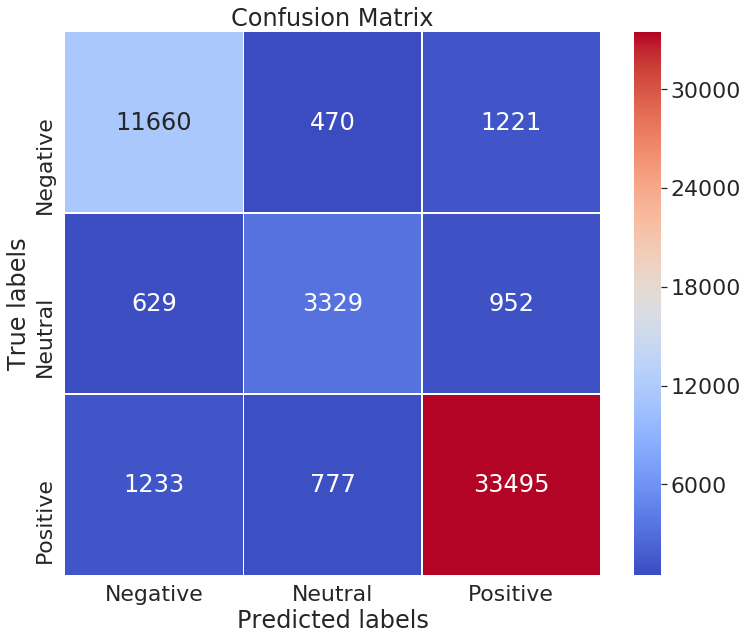

In [0]:
sns.set(rc={'figure.figsize':(12,10)}, font_scale=2)
ax= plt.subplot()
cm = confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))
sns.heatmap(cm, annot=True, ax = ax, fmt='g', linewidths=.5, cmap='coolwarm'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative',  'Neutral', 'Positive']); 
ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
plt.savefig('Confusion matrix CNN')
;

In [0]:
from sklearn.metrics import roc_curve, auc

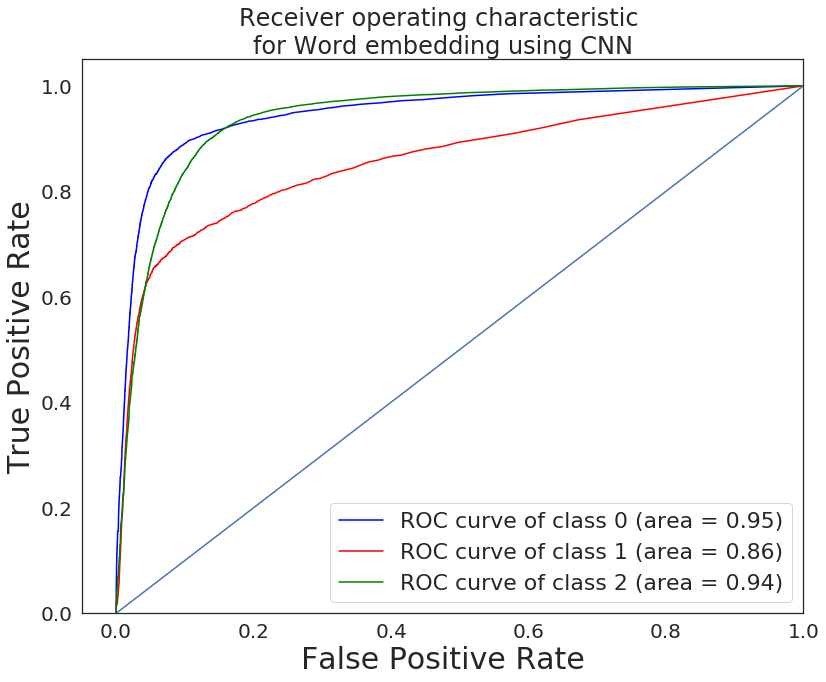

In [0]:
 sns.set_style("white")
 preds = model.predict(sentences_test)
 

n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1])
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 30)
plt.ylabel('True Positive Rate',fontsize = 30)
plt.title('Receiver operating characteristic \nfor Word embedding using CNN')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('ROC weight loss.png')
plt.savefig('ROC CNN')
plt.show(); 